Import Dataset

In [ ]:
! pip install opendatasets
! pip install pandas

In [ ]:
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nnnguyen
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10


100%|██████████| 586M/586M [00:06<00:00, 93.9MB/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE=(20,20)
BATCH=32
dataset = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = tf.keras.preprocessing.image_dataset_from_directory(
        '/content/animals10/raw-img',validation_split=0.2,subset='training',
        seed=23,image_size=IMG_SIZE,batch_size=BATCH)

val_gen =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/animals10/raw-img',validation_split=0.2,subset="validation",
    seed=123,image_size=IMG_SIZE,batch_size=BATCH,
)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


# Build a neural network model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding = "same", input_shape = [20, 20, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 2
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 5
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3
model.add(tf.keras.layers.Flatten()) #Flaterning
model.add(tf.keras.layers.Dense(units=350, activation="relu"))#Full Connection1
tf.keras.layers.Dropout(0.5)  # Add dropout after the first dense layer
model.add(tf.keras.layers.Dense(units=150, activation="relu"))
tf.keras.layers.Dropout(0.5)   # Add dropout after the second dense layer
model.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 256)         2

#compiling the model:


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# training neural network model:


In [ ]:
history = model.fit(train_gen,validation_data=val_gen,epochs=20)

Epoch 1/20
655/655 [==============================] - 213s 323ms/step - loss: 2.1722 - accuracy: 0.2581 - val_loss: 1.9077 - val_accuracy: 0.3326
Epoch 2/20
655/655 [==============================] - 213s 326ms/step - loss: 1.8659 - accuracy: 0.3449 - val_loss: 1.7898 - val_accuracy: 0.3694
Epoch 3/20
655/655 [==============================] - 205s 312ms/step - loss: 1.7554 - accuracy: 0.3853 - val_loss: 1.6789 - val_accuracy: 0.4260
Epoch 4/20
655/655 [==============================] - 214s 327ms/step - loss: 1.6759 - accuracy: 0.4133 - val_loss: 1.6004 - val_accuracy: 0.4541
Epoch 5/20
655/655 [==============================] - 220s 335ms/step - loss: 1.5829 - accuracy: 0.4488 - val_loss: 1.4681 - val_accuracy: 0.4967
Epoch 6/20
655/655 [==============================] - 213s 325ms/step - loss: 1.4996 - accuracy: 0.4809 - val_loss: 1.4552 - val_accuracy: 0.4959
Epoch 7/20
655/655 [==============================] - 216s 330ms/step - loss: 1.3993 - accuracy: 0.5139 - val_loss: 1.3772 -

In [ ]:
# Save the model
my_model = 'my_model_path.h5'
model.save(my_model)
print("Model saved successfully at:", my_model)
loaded_model = tf.keras.models.load_model(my_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: my_model_path.h5


#Evaluation



In [ ]:
# Evaluate the model on the validation set
score = model.evaluate(val_gen)
print('Total loss on Testing Set:', score[0])
print('Accuracy of Testing Set:', score[1])

164/164 [==============================] - 15s 93ms/step - loss: 1.3858 - accuracy: 0.7053
Total loss on Testing Set: 1.3857799768447876
Accuracy of Testing Set: 0.7052531242370605


#Predicting the first three images from the test set


1.   print the predicted results of the test set
2.   print the real label of the first three images from the test set
3.   Plot the training and validation accuracy and loss


In [ ]:
proba = model.predict(val_gen)
proba.round(2)

164/164 [==============================] - 15s 91ms/step


array([[0.04, 0.04, 0.  , ..., 0.02, 0.01, 0.  ],
       [0.  , 0.01, 0.  , ..., 0.01, 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.04, 0.95, ..., 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.  , ..., 0.81, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ]], dtype=float32)

In [ ]:
pred = np.argmax( model.predict(val_gen), axis=-1)
pred

164/164 [==============================] - 16s 96ms/step


array([1, 8, 7, ..., 3, 0, 1])

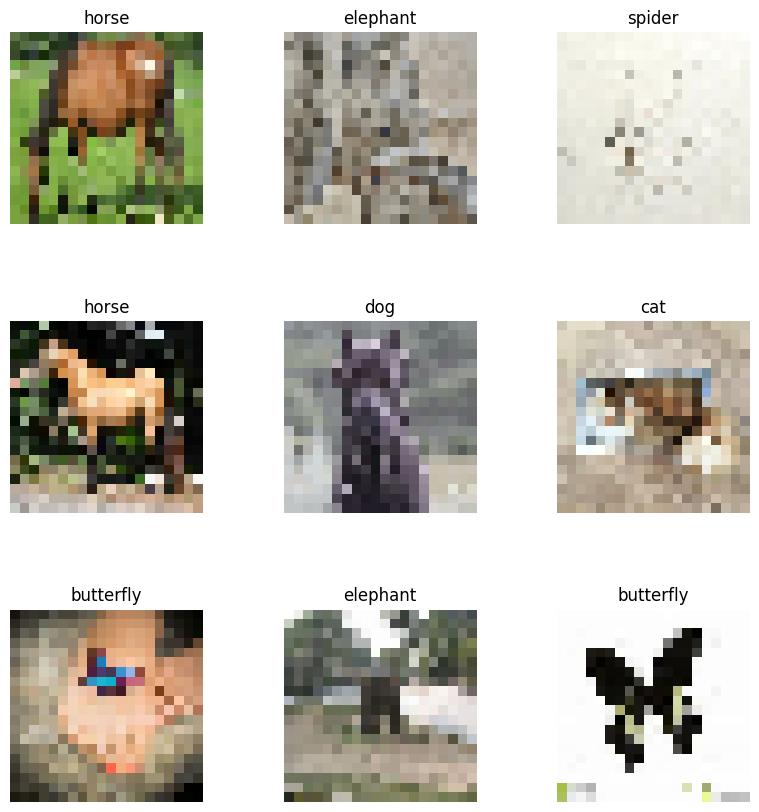

In [59]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}
classes=train_gen.class_names
plt.figure(figsize=(10,10), dpi=100)
for images,labels in train_gen.take(1):
    for n in  range(9):
        ax=plt.subplot(3,3,n+1)
        plt.imshow(images[n].numpy().astype('uint8'), cmap="binary", interpolation="nearest")
        translated_label = translate[classes[labels[n]]]
        plt.title(translated_label, fontsize=12)
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

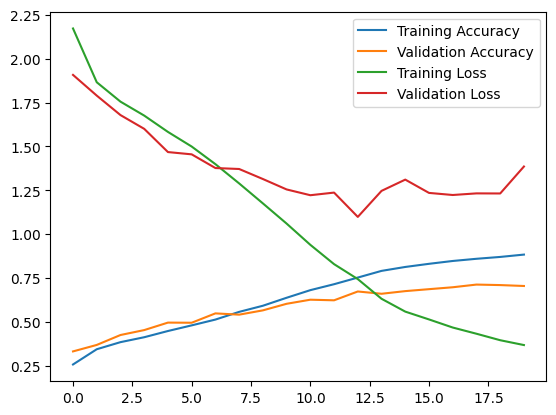

In [60]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()